In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

In [2]:
# Check first 5 rows
print(df.head())

# List all columns
print(df.columns)

# Check missing values
print(df.isnull().sum())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [3]:
## Filter countries of interest

countries = ["Belgium", "Kenya", "Burkina Faso", "Singapore"]
filtered_df = df[df['location'].isin(countries)]

In [4]:
## Convert date column to datetime

filtered_df['date'] = pd.to_datetime(filtered_df['date'])

/tmp/ipykernel_746/1724334852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


In [5]:
filtered_df = df[df['location'].isin(countries)].copy()
filtered_df['date'] = pd.to_datetime(filtered_df['date']) 

In [6]:
## handle missing values

filtered_df.fillna(0, inplace=True)

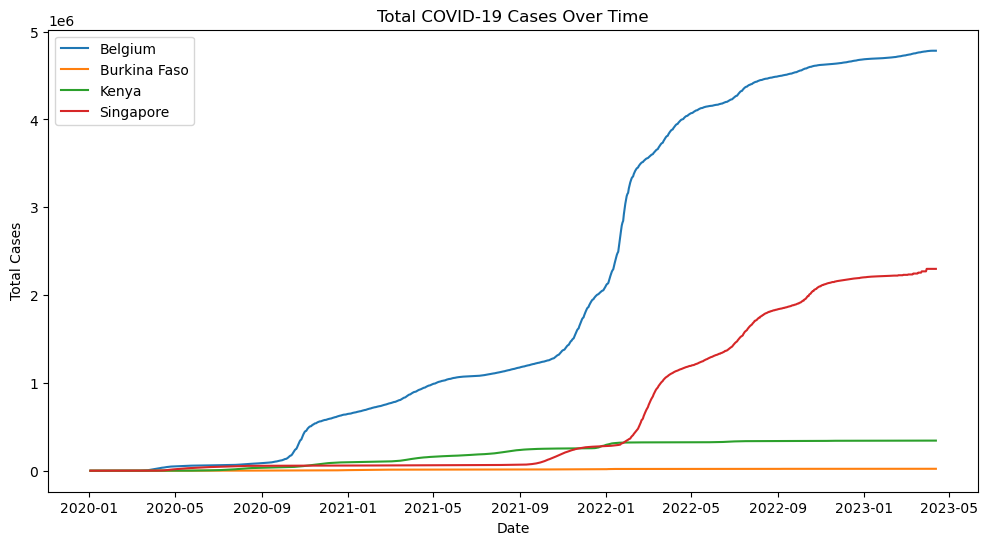

In [7]:
## Plot total cases over time

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='total_cases', hue='location')
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

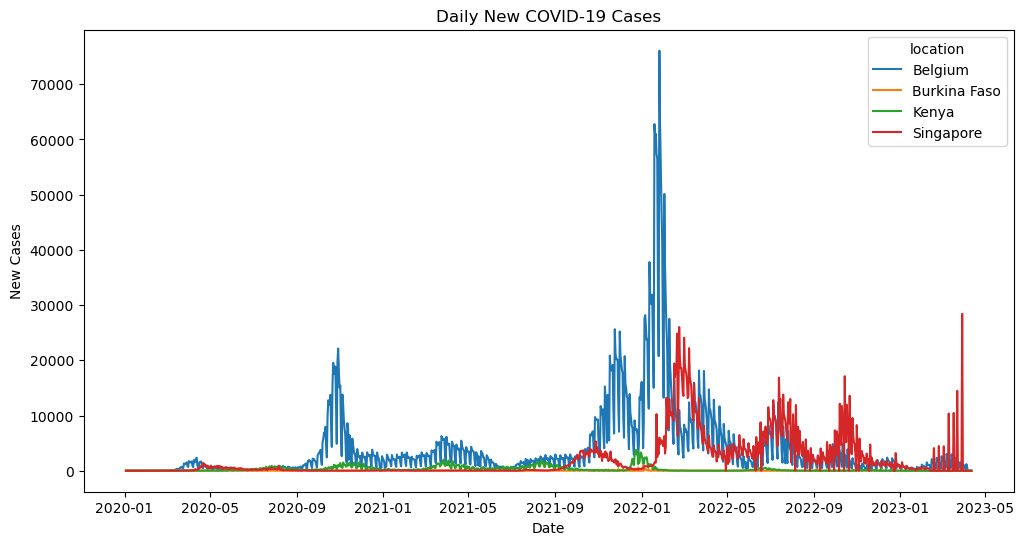

In [8]:
## Compare daily new cases between countries

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='new_cases', hue='location')
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

In [9]:
## Calculate the death rate

filtered_df['death_rate'] = (filtered_df['total_deaths'] / filtered_df['total_cases']) * 100
print(filtered_df[['location', 'death_rate']].groupby('location').mean())

              death_rate
location                
Belgium         3.567142
Burkina Faso    2.257068
Kenya           1.978318
Singapore       0.091118


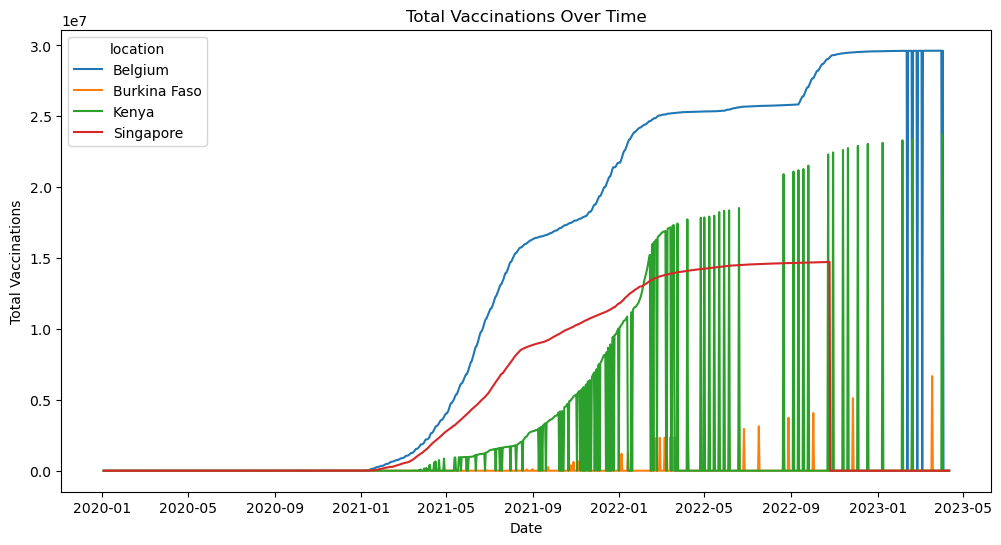

In [10]:
## Cumulative vaccinations over time for selected countries

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='total_vaccinations', hue='location')
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

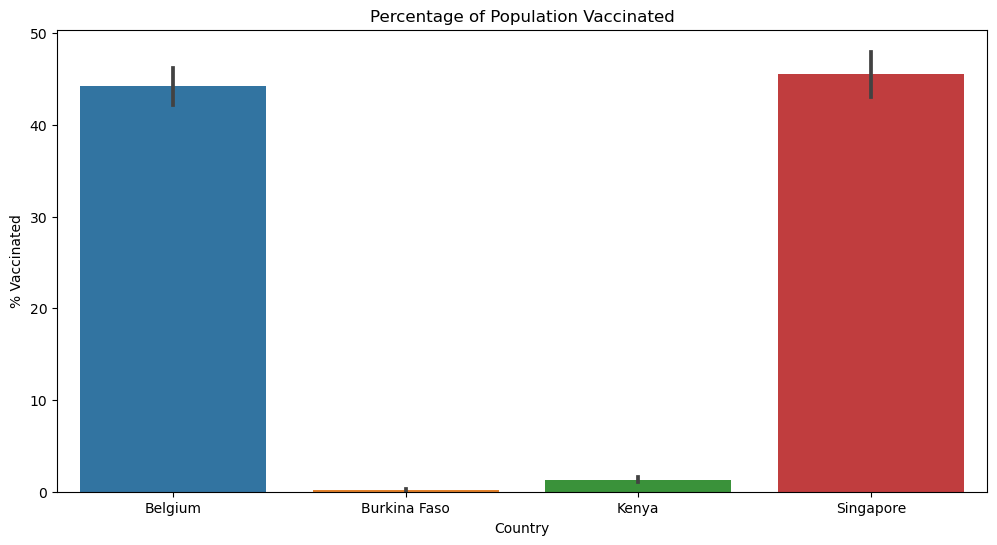

In [11]:
## Compare % vaccinated population

filtered_df['vaccination_percentage'] = (filtered_df['people_vaccinated'] / filtered_df['population']) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='location', y='vaccination_percentage')
plt.title("Percentage of Population Vaccinated")
plt.xlabel("Country")
plt.ylabel("% Vaccinated")
plt.show()

## Insights and reporting

### Case trends comparison
1. Belgium had the highest peak in daily cases.
2. Singapore showed rapid surges but strong containment, with cases dropping sharply after peaks.
3. Kenya & Burkina Faso had lower reported cases, likely due to testing limitations or underreporting.

### Death rate analysis
1. Belgium had the highest death rate (3.57%), possibly due to an older population.
2. Singapore maintained the lowest death rate (0.09%) due to strong healthcare and vaccination.

### Vaccination progress
1. Singapore led with the highest vaccination rate.
2.  Kenya & Burkina Faso lagged (<10% vaccinated), showing global vaccine inequality.US."

## Summary report

While Belgium and Singapore had robust reporting systems, African nations like Kenya and Burkina Faso showed likely undercounting. Singapore’s vaccination success contrasted sharply with Kenya and Burkina Faso, reflecting global inequities in healthcare access. Belgium’s high death rate suggests demographic vulnerabilities, whereas Singapore’s low rate highlights pandemic preparedness.